## Варинат 9: random_state = 78; class_sep = 0.45, classification 
1. Создать нутбук
2. Импорт библиотек**  
3. Параметры по варианту,  X, y = make_classification.  
4. Первые 15 элементов выборки  
5. График сгенерированной выборки  
  - plt.scatter (X[:,0], X[:,1], c=y); plt.show  
6. Разбиение на тестовое и обучающее множества  
  - train_test_split  
7. Графики выброк
  - График обучающей выборки  
    - plt.scatter (X_train[:,0], X_train[:,1], c=y_train)  
  - График тестовой выборки  
    - plt.scatter (X_test[:,0], X_test[:,1], c=y_test)  
*Доп. Код для быстрой записи данных в таблицы (к лабе не относится)*  

8. Обучение модели, классификация 00. Оценка качества модели. 
- П.Knn-1.8. Метод k-ближайших соседей (n_neighbors = {1}) 
  - П.Knn-1.8.1 Метод k-ближайших соседей
  - П.Knn-1.8.2 Матрица ошибок (confusion matrix)
  - П.Knn-1.8.3 Значения полноты, точности, f1-меры и аккуратности
  - П.Knn-1.8.4 Значение площади под кривой ошибок (AUC ROC)
  - П.Knn-1.8.5 Отобразить на графике область принятия решений по каждому классу
- П.Knn-3.8. Метод k-ближайших соседей (n_neighbors = {3})
- П.Knn-9.8. Метод k-ближайших соседей (n_neighbors = {9})
- П.GauNB.8. Наивный байесовский метод 
- П.Forest-5.8. Случайный лес (n_estimators = {5})
- П.Forest-15. 8.(n_estimators = {15})
- П.Forest-50. 8.(n_estimators = {50})
9. Таблица с результатами классификации всеми методами 
10. Меняем random_state
- random_state = 5
- random_state = 100
11. Финальная таблица
- Все таблицы
- Итоговая таблица со средним значениям метрик по методам
12. Вывод

# Импорт библиотек  
### П.1-3

In [1]:
# библиотека для работы с массивами
import numpy as np 

# Требуемые модули из sklearn
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Параметры по варианту
random_state = 78
class_sep = 0.45

In [86]:
import statistics as stat

X, y = make_classification(random_state=random_state, class_sep=class_sep,
                          n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, n_samples=1000)

df = pd.DataFrame(X)
df

,0,1
0,1.488283,-0.710443
1,-0.710254,0.693938
2,0.533444,-1.311364
3,1.081045,0.534466
4,-0.397225,0.129783
...,...,...
995,-0.046600,0.284314
996,0.346767,-0.647186
997,0.905443,0.281725
998,-0.073874,0.556537


In [79]:
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        df.loc[i][j] = (df.loc[i][j] - df.mean()[j])/df.std()[j]
df

,0,1
0,1.333074,-0.923182
1,-0.912531,1.150650
2,0.480604,-1.664037
3,1.013646,0.690090
4,-0.425116,0.174150
...,...,...
995,-0.060540,0.314779
996,0.328948,-0.706424
997,0.882119,0.311953
998,-0.087492,0.613165


## Стандартизация

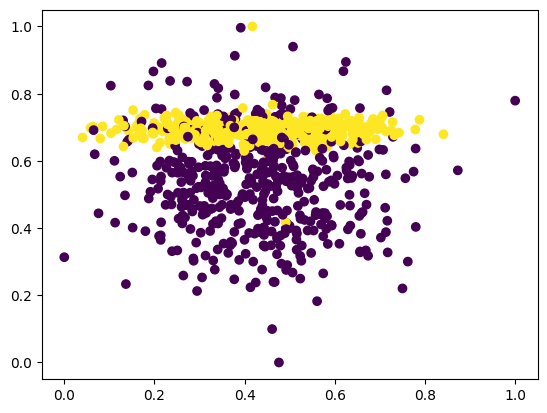

In [96]:
from sklearn import preprocessing
import numpy as np

min_max_scaler = preprocessing.MinMaxScaler()
X_standartization = min_max_scaler.fit_transform(X)
X_standartization

plt.scatter(X_standartization[:,0], X_standartization[:,1], c=y)

**random_state = 78** - количество образцов.  
**class_sep=0.45** - коэффициент, умножающий размер гиперкуба, упрощает задачу классификации.  
**n_features = 2** - количество характеристик:  
**n_redundant=0** - избыточные функции;  
**n_informative=1** - информативные функции;  
**n_clusters_per_class=1** - количество кластеров на класс.  
 
//n_informative=2 - двумерный гиперкуб со сторонами  2*class_sep (2*0.45) и назначает равное количество кластеров каждому сорт.

# Первые 15 элементов выборки  
### П.4

In [4]:
print(X[0:15])

[[ 1.48828264e+00 -7.10442604e-01]
 [-7.10253928e-01  6.93938341e-01]
 [ 5.33444250e-01 -1.31136377e+00]
 [ 1.08104452e+00  5.34466225e-01]
 [-3.97224728e-01  1.29783335e-01]
 [ 1.12862644e-01  5.10913913e-01]
 [ 7.13520454e-04  7.42926105e-01]
 [-1.50699375e+00 -1.51932200e+00]
 [-7.09257115e-01  4.58339246e-01]
 [-1.51395805e+00 -1.13202013e-01]
 [ 1.64173194e+00  5.62099713e-01]
 [-2.07311044e+00 -7.20098263e-01]
 [ 1.21634891e+00  4.34451064e-01]
 [-1.39209028e+00  5.71283980e-01]
 [ 4.57465767e-01  5.26568280e-01]]


In [65]:
X

array([[ 1.48828264, -0.7104426 ],
       [-0.71025393,  0.69393834],
       [ 0.53344425, -1.31136377],
       ...,
       [ 0.90544255,  0.28172494],
       [-0.07387366,  0.55653716],
       [ 0.26845158,  0.49306958]])

# График сгенерированной выборки. Классы отмечены разными цветами  
### П.5

Отобразим на графике сгенерированные данные. координаы точек - первый, чторой столбец массива x. Параметр "c" используем для указания цвета точки - метку класса из массива y. 

<function matplotlib.pyplot.show(close=None, block=None)>

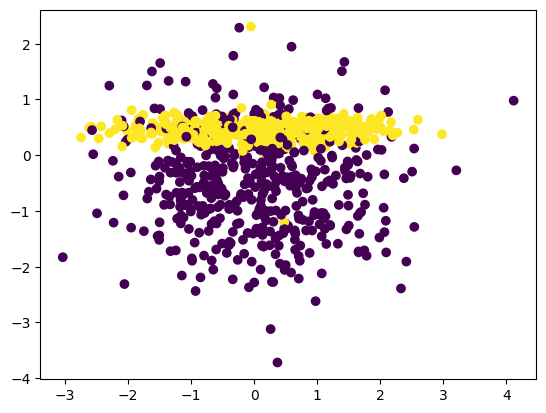

In [57]:
import matplotlib.pyplot as plt

plt.scatter (X[:,0], X[:,1], c=y)
plt.show

Объекты двух классов пересекаются между собой

# Разбиение на тестовую и обучающую выборки  
### П.6
Используем ф-ю **train_test_split**: аргументы - массивы x и y.  
На тестовую часть пойдет 25%  - **test_size = 0.25**, на обучающую 75%.  
**random_state = 1** - разбиение случайно, но воспроизводимо;  
random_state = None - невоспроизводимо.  
 
Результаты записываются в переменные:  
**X_train, X_test** - координаты объектов из обучающей и тестовой выборки;   
**y_train, y_test** - метки классов объектов из обучающей и тестовой выборки.  
//Для обучения модели исп X_train, y_train;  
//Для ценки точности модели исп X_test, y_test.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

# Графики обучающей и тестовой выборок  
### П.7

### П.7.1 График обучающей выборки 

<function matplotlib.pyplot.show(close=None, block=None)>

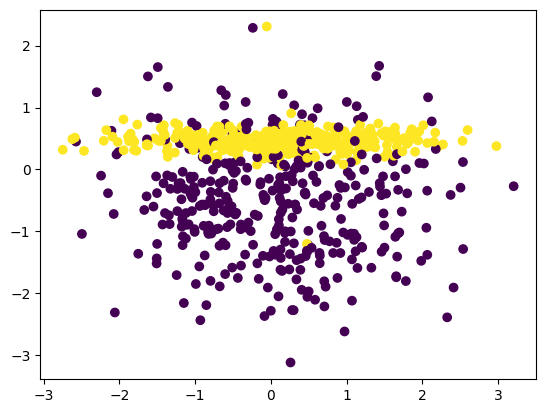

In [7]:
plt.scatter (X_train[:,0], X_train[:,1], c=y_train)
plt.show

### П.7.2 График тестовой выборки

<function matplotlib.pyplot.show(close=None, block=None)>

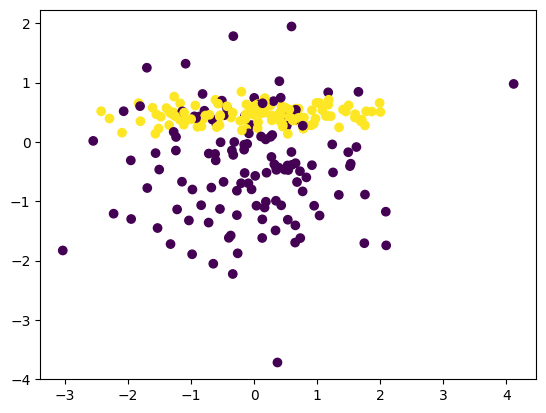

In [8]:
plt.scatter (X_test[:,0], X_test[:,1], c=y_test)
plt.show

### Код для быстрой записи данных в таблицы (к лабе не относится)

In [9]:
import pandas as pd

class Table():
    def __init__(self, title=None, data=None, headlines=["Precision", "Recall", "F1-score", "Accuracy", "ROC AUC"],
                 indexes=["knn_1", "knn_3", "knn_9",
                       "naive_bayes",
                       "rnd_forest_5", "rnd_forest_15", "rnd_forest_50"], weighted=True):
        
        self.headlines = headlines
        self.dataFrame = pd.DataFrame(columns=headlines, index=indexes)
        if weighted:
            self.dataFrame.columns = pd.MultiIndex.from_tuples(
                tuple(zip(('Weighted Avg', 'Weighted Avg','Weighted Avg', 'Value', 'Value'), self.dataFrame.columns)))
        
    def fill_row(self, row, data=[], clsReport='', roc_auc=None):
        """
        Заполняет строки исходя из дефолта
        row - row index
        clsReport - матрица classification_report в случае, если значения берутся оттуда. Заполняется значениями Weighted Avg"""
        if clsReport != '':
            data = []
            clsReport = clsReport.split()
            data.append(clsReport[25])
            data.append(clsReport[26])
            data.append(clsReport[27])
            data.append(clsReport[15])
            data.append(round(roc_auc, 2))
        for i in range(len(self.headlines)):
            self.dataFrame.loc[row][i] = data[i]    
            
    def table(self):
        return self.dataFrame
        
    def __repr__(self):
        return f'{self.dataFrame}'

# Обучение модели, классификация 00. Оценка качества модели
### П.Knn-1. 8. Метод k-ближайших соседей (`n_neighbors` = {1})

### П.Knn-1.8.1

In [10]:
knn = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')

**KNeighborsClassifier** - метод к-ближайших соседей, модуль из библиотеки scikit-learn.  
Создадим переменную **knn** - модель классификатора:  
n_neighbors=1 - кол-во ближайших соседей = 1;  
metric = 'euclidean' - евклидова метрика.

In [11]:
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

Обучим модель. Исп метод **fit()**, передадим координаты обектов (X_train) и метки классов обучающей выборки (y_train).

In [12]:
prediction = knn.predict(X_test)

Проверим модель на тестовой выборке. Исп метод **predict()**. Подаем только координаты объектов (X_test) без истинных меток класса (y_test).  
В переменную **prediction** метод вернул предсказанные метки классов для каждого объекта из переменной X_test.  
 
Проверим качество модели. Истинные метки классов в y_test. Оценим точность работы модели - выведем истинные и предсказанные переменные (см. print) 

### П.Knn-1.8.2 Матрица ошибок (confusion matrix)  
Оценим **матрицу неточностей/ошибок** - **confusion matrix** - исп ф-ю confusion_matrix(y_test, prediction): передадим истинные и предсказанные значения.  
Ф-я **accuracy_score(prediction, y_test)** оценивает точность/аккуратность классификации. 

In [13]:
# Оценка качества модели
print ('Prediction and test: ')
print (prediction)
print (y_test)
print ('Confusion matrix: ')
print (confusion_matrix(y_test, prediction))

Prediction and test: 
[0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0
 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0
 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1
 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0
 0 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0]
[0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1
 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0
 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1
 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1
 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0
 0 1 0 0 1 0 0 0 0 1

### П.Knn-1.8.3 Значения полноты, точности, f1-меры и аккуратности  
Ф-я **classification_report(y_test, prediction)** (запишем в переменную cls_rep) - оценка показателей полноты-точности и f1-меры.  

In [14]:
print ('Accuracy score: ', accuracy_score(prediction, y_test))
cls_rep = classification_report(y_test, prediction)
print(cls_rep)

Accuracy score:  0.784
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       128
           1       0.76      0.81      0.79       122

    accuracy                           0.78       250
   macro avg       0.78      0.78      0.78       250
weighted avg       0.79      0.78      0.78       250



### П.Knn-1.8.4 Значение площади под кривой ошибок (AUC ROC)  
Оценка показателя AUC ROC (см. roc_auc): roc_auc_score(y_test, prediction). 

In [15]:
roc_auc = roc_auc_score(y_test, prediction)
print("roc_auc", roc_auc)

roc_auc 0.7846439549180328


In [16]:
#knn = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')
#knn.fit(X_train, y_train)
#prediction = knn.predict(X_test)

# Оценка качества модели
#print ('Prediction and test: ')
#print (prediction)
#print (y_test)
#print ('Confusion matrix: ')
#print (confusion_matrix(y_test, prediction))
#print ('Accuracy score: ', accuracy_score(prediction, y_test))
#cls_rep = classification_report(y_test, prediction)
#print(cls_rep)
#roc_auc = roc_auc_score(y_test, prediction)
#print("roc_auc", roc_auc)

# Промежуточный код для записи значений в таблицу
table1 = Table()
table1.fill_row(row='knn_1', clsReport=cls_rep, roc_auc=roc_auc)

In [17]:
def plot_2d_separator(classifier, X, fill=False, line=True, ax=None, eps=None):
    if eps is None:
        eps = 1.0 #X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)
    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]
        if ax is None:
            ax = plt.gca()
        if fill:
            ax.contourf(X1, X2, decision_values.reshape(X1.shape),
            levels=fill_levels, colors=['cyan', 'pink', 'yellow'])
        if line:
            ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels, colors="black")
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())

### П.Knn-1.8.5 Отобразить на графике область принятия решений по каждому классу  
Отобразим на графике область принятия решений по каждому классу: **plot_2d_separator(knn, X, fill=True)** - передим на вход объект classifier – модель классификатора (knn), X – массив входных данных.

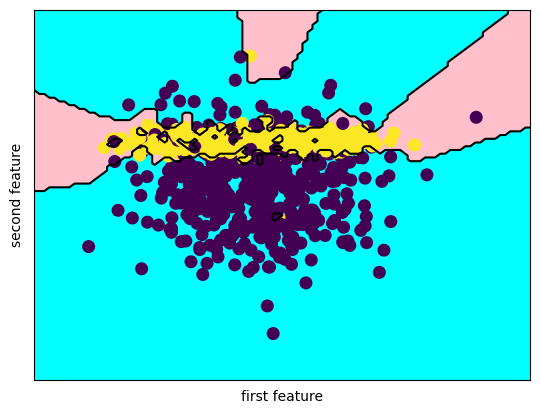

In [18]:
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

В качестве методов классификации использовать:  
Метод к-ближайших соседей (`n_neighbors` = {1, 3, 9})  
Наивный байесовский метод  
Случайный лес (`n_estimators` = {5, 15, 50})

# Обучение модели и классификация п8 01
### П.Knn-3.8. Метод k-ближайших соседей (`n_neighbors` = {3})

In [19]:
knn = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean')
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
# Оценка качества модели
print ('Prediction and test: ')
print (prediction)
print (y_test)
print ('Confusion matrix: ')
print (confusion_matrix(y_test, prediction))
print ('Accuracy score: ', accuracy_score(prediction, y_test))
cls_rep = classification_report(y_test, prediction)
print(cls_rep)
roc_auc = roc_auc_score(y_test, prediction)
print("roc_auc", roc_auc)

# Промежуточный код для записи значений в таблицу
table1.fill_row(row='knn_3', clsReport=cls_rep, roc_auc=roc_auc)

Prediction and test: 
[0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0
 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1
 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1
 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0
 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0]
[0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1
 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0
 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1
 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1
 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0
 0 1 0 0 1 0 0 0 0 1

# Обучение модели и классификация п8 02
### П.Knn-9. 8. Метод k-ближайших соседей (`n_neighbors` = {9})

In [20]:
knn = KNeighborsClassifier(n_neighbors=9, metric = 'euclidean')
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
# Оценка качества модели
print ('Prediction and test: ')
print (prediction)
print (y_test)
print ('Confusion matrix: ')
print (confusion_matrix(y_test, prediction))
print ('Accuracy score: ', accuracy_score(prediction, y_test))
cls_rep = classification_report(y_test, prediction)
print(cls_rep)
roc_auc = roc_auc_score(y_test, prediction)
print("roc_auc", roc_auc)

# Промежуточный код для записи значений в таблицу
table1.fill_row(row='knn_9', clsReport=cls_rep, roc_auc=roc_auc)

Prediction and test: 
[0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1
 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0
 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0]
[0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1
 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0
 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1
 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1
 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0
 0 1 0 0 1 0 0 0 0 1

# п8. Наивный байесовский метод 03
### П.GauNB. 8.

Prediction and test: 
[0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0
 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1
 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1
 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0
 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0]
[0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1
 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0
 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1
 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1
 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0
 0 1 0 0 1 0 0 0 0 1

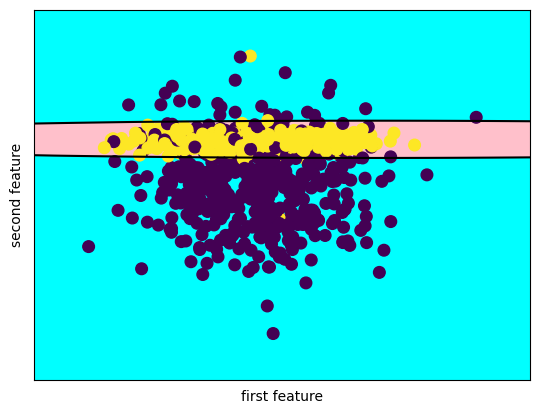

In [21]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
# Оценка качества модели
print ('Prediction and test: ')
print (y_pred)
print (y_test)
print ('Confusion matrix: ')
print (confusion_matrix(y_test, y_pred))
print ('Accuracy score: ', accuracy_score(prediction, y_test))
cls_rep = classification_report(y_test, prediction)
print(cls_rep)
roc_auc = roc_auc_score(y_test, prediction)
print("roc_auc", roc_auc)
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(gnb, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

# Промежуточный код для записи значений в таблицу
table1.fill_row(row='naive_bayes', clsReport=cls_rep, roc_auc=roc_auc)

# п8. Случайный лес 04
### П.Forest-5. 8. (`n_estimators` = {5})

Prediction and test: 
[0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0
 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1
 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1
 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1
 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0
 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1]
[0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0
 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0
 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1
 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0
 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0
 0 1 1 1 1 1 0 0 1 0

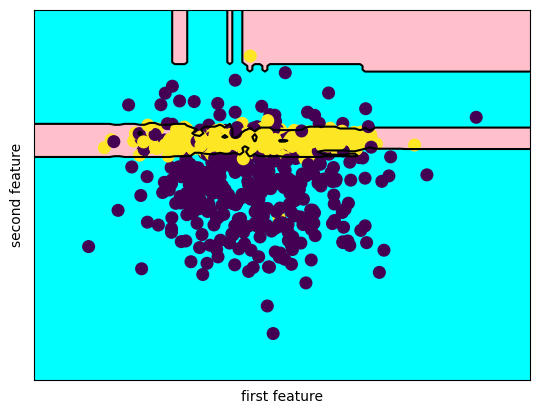

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=5)
model.fit(X_train, y_train)
y_proba = model.predict(X_test)

# Оценка качества модели
print ('Prediction and test: ')
print (y_proba)
print (y_test)
print ('Confusion matrix: ')
print (confusion_matrix(y_test, y_proba))
print ('Accuracy score: ', accuracy_score(prediction, y_test))
cls_rep = classification_report(y_test, prediction)
print(cls_rep)
roc_auc = roc_auc_score(y_test, prediction)
print("roc_auc", roc_auc)
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(model, X_train, fill=True)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=70)

# Промежуточный код для записи значений в таблицу
table1.fill_row(row='rnd_forest_5', clsReport=cls_rep, roc_auc=roc_auc)

# п8. Случайный лес 04
### П.Forest-15. 8.(`n_estimators` = {15})

Prediction and test: 
[0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0
 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1
 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1
 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0
 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0]
[0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1
 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0
 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1
 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1
 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0
 0 1 0 0 1 0 0 0 0 1

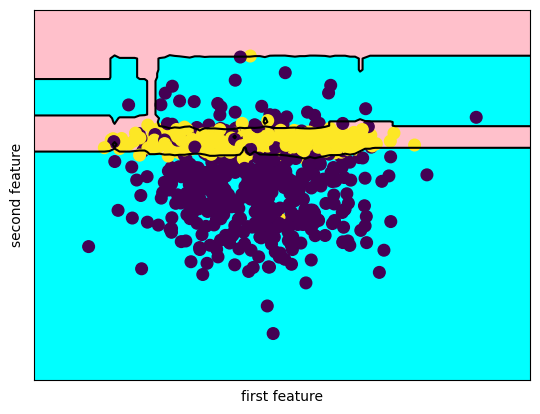

In [23]:
model = RandomForestClassifier(n_estimators=15)
model.fit(X_train, y_train)
y_proba = model.predict(X_test)

# Оценка качества модели
print ('Prediction and test: ')
print (y_proba)
print (y_test)
print ('Confusion matrix: ')
print (confusion_matrix(y_test, y_proba))
print ('Accuracy score: ', accuracy_score(prediction, y_test))
cls_rep = classification_report(y_test, prediction)
print(cls_rep)
roc_auc = roc_auc_score(y_test, prediction)
print("roc_auc", roc_auc)

# Промежуточный код для записи значений в таблицу
table1.fill_row(row='rnd_forest_15', clsReport=cls_rep, roc_auc=roc_auc)

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(model, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

# п8. Случайный лес 05
### П.Forest-50. 8.(`n_estimators` = {50})

In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_proba = model.predict(X_test)

# Оценка качества модели
print ('Prediction and test: ')
print (y_proba)
print (y_test)
print ('Confusion matrix: ')
print (confusion_matrix(y_test, y_proba))
print ('Accuracy score: ', accuracy_score(prediction, y_test))
cls_rep = classification_report(y_test, prediction)
print(cls_rep)
roc_auc = roc_auc_score(y_test, prediction)
print("roc_auc", roc_auc)
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(model, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

# Промежуточный код для записи значений в таблицу
table1.fill_row(row='rnd_forest_50', clsReport=cls_rep, roc_auc=roc_auc)

# п9. Таблица с результатами классификации всеми методами 06  
### П.9

In [25]:
table1.table()

Weighted Avg                    Value        
                 Precision Recall F1-score Accuracy ROC AUC
knn_1                 0.79   0.78     0.78     0.78    0.78
knn_3                 0.86   0.84     0.84     0.84    0.85
knn_9                 0.89   0.87     0.87     0.87    0.87
naive_bayes           0.89   0.87     0.87     0.87    0.87
rnd_forest_5          0.89   0.87     0.87     0.87    0.87
rnd_forest_15         0.89   0.87     0.87     0.87    0.87
rnd_forest_50         0.89   0.87     0.87     0.87    0.87

# п10. random_state = 5  
### П.10.1 random_state = 5

In [26]:
#П10 random_state = 5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
#Метод k-ближайших соседей (n_neighbors = {1})
knn = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
# Оценка качества модели
cls_rep = classification_report(y_test, prediction)
roc_auc = roc_auc_score(y_test, prediction)
# Промежуточный код для записи значений в таблицу
table_randS_5 = Table()
table_randS_5.fill_row(row='knn_1', clsReport=cls_rep, roc_auc=roc_auc)


#Метод k-ближайших соседей (n_neighbors = {3})
knn = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
# Оценка качества модели
cls_rep = classification_report(y_test, prediction)
roc_auc = roc_auc_score(y_test, prediction)
# Промежуточный код для записи значений в таблицу
table_randS_5.fill_row(row='knn_3', clsReport=cls_rep, roc_auc=roc_auc)


#Метод k-ближайших соседей (n_neighbors = {9})
knn = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
# Оценка качества модели
cls_rep = classification_report(y_test, prediction)
roc_auc = roc_auc_score(y_test, prediction)
# Промежуточный код для записи значений в таблицу
table_randS_5.fill_row(row='knn_9', clsReport=cls_rep, roc_auc=roc_auc)

#Наивный байесовский метод

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
# Оценка качества модели
cls_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
# Промежуточный код для записи значений в таблицу
table_randS_5.fill_row(row='naive_bayes', clsReport=cls_rep, roc_auc=roc_auc)

#Случайный лес 04 (n_estimators = {5})
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
model = RandomForestClassifier(n_estimators=5)
model.fit(X_train, y_train)
y_proba = model.predict(X_test)
# Оценка качества модели
cls_rep = classification_report(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
# Промежуточный код для записи значений в таблицу
table_randS_5.fill_row(row='rnd_forest_5', clsReport=cls_rep, roc_auc=roc_auc)

#Случайный лес 04 (n_estimators = {15})
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=15)
model.fit(X_train, y_train)
y_proba = model.predict(X_test)
# Оценка качества модели
cls_rep = classification_report(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
# Промежуточный код для записи значений в таблицу
table_randS_5.fill_row(row='rnd_forest_15', clsReport=cls_rep, roc_auc=roc_auc)

#Случайный лес 04 (n_estimators = {50})
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, y_train)
y_proba = model.predict(X_test)
# Оценка качества модели
cls_rep = classification_report(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
# Промежуточный код для записи значений в таблицу
table_randS_5.fill_row(row='rnd_forest_50', clsReport=cls_rep, roc_auc=roc_auc)

In [27]:
table_randS_5.table()

Weighted Avg                    Value        
                 Precision Recall F1-score Accuracy ROC AUC
knn_1                 0.82   0.82     0.82     0.82    0.82
knn_3                 0.82   0.82     0.82     0.82    0.82
knn_9                 0.82   0.82     0.82     0.82    0.82
naive_bayes           0.91   0.90     0.90     0.90     0.9
rnd_forest_5          0.88   0.87     0.87     0.87    0.87
rnd_forest_15         0.89   0.88     0.88     0.88    0.88
rnd_forest_50         0.88   0.87     0.87     0.87    0.87

# п10. random_state = 100  
### П.10.2 random_state = 100

In [28]:
#П10 random_state = 100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)
#Метод k-ближайших соседей (n_neighbors = {1})
knn = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
# Оценка качества модели
cls_rep = classification_report(y_test, prediction)
roc_auc = roc_auc_score(y_test, prediction)
# Промежуточный код для записи значений в таблицу
table_randS_100 = Table()
table_randS_100.fill_row(row='knn_1', clsReport=cls_rep, roc_auc=roc_auc)


#Метод k-ближайших соседей (n_neighbors = {3})
knn = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
# Оценка качества модели
cls_rep = classification_report(y_test, prediction)
roc_auc = roc_auc_score(y_test, prediction)
# Промежуточный код для записи значений в таблицу
table_randS_100.fill_row(row='knn_3', clsReport=cls_rep, roc_auc=roc_auc)


#Метод k-ближайших соседей (n_neighbors = {9})
knn = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
# Оценка качества модели
cls_rep = classification_report(y_test, prediction)
roc_auc = roc_auc_score(y_test, prediction)
# Промежуточный код для записи значений в таблицу
table_randS_100.fill_row(row='knn_9', clsReport=cls_rep, roc_auc=roc_auc)

#Наивный байесовский метод

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
# Оценка качества модели
cls_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
# Промежуточный код для записи значений в таблицу
table_randS_100.fill_row(row='naive_bayes', clsReport=cls_rep, roc_auc=roc_auc)

#Случайный лес 04 (n_estimators = {5})
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
model = RandomForestClassifier(n_estimators=5)
model.fit(X_train, y_train)
y_proba = model.predict(X_test)
# Оценка качества модели
cls_rep = classification_report(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
# Промежуточный код для записи значений в таблицу
table_randS_100.fill_row(row='rnd_forest_5', clsReport=cls_rep, roc_auc=roc_auc)

#Случайный лес 04 (n_estimators = {15})
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=15)
model.fit(X_train, y_train)
y_proba = model.predict(X_test)
# Оценка качества модели
cls_rep = classification_report(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
# Промежуточный код для записи значений в таблицу
table_randS_100.fill_row(row='rnd_forest_15', clsReport=cls_rep, roc_auc=roc_auc)

#Случайный лес 04 (n_estimators = {50})
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, y_train)
y_proba = model.predict(X_test)
# Оценка качества модели
cls_rep = classification_report(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
# Промежуточный код для записи значений в таблицу
table_randS_100.fill_row(row='rnd_forest_50', clsReport=cls_rep, roc_auc=roc_auc)

In [29]:
table_randS_100.table()

Weighted Avg                    Value        
                 Precision Recall F1-score Accuracy ROC AUC
knn_1                 0.82   0.82     0.82     0.82    0.82
knn_3                 0.82   0.82     0.82     0.82    0.82
knn_9                 0.82   0.82     0.82     0.82    0.82
naive_bayes           0.91   0.89     0.89     0.89    0.88
rnd_forest_5          0.88   0.88     0.88     0.88    0.88
rnd_forest_15         0.88   0.88     0.88     0.88    0.88
rnd_forest_50         0.91   0.91     0.91     0.91    0.91

In [116]:
x_train, x_test, y_train, y_test = train_test_split(X_standartization, y, test_size=0.25, random_state=1)

#Случайный лес 04 (n_estimators = {50})
model = RandomForestClassifier(n_estimators=50)
model.fit(x_train, y_train)
y_proba = model.predict(x_test)
# Оценка качества модели
cls_rep = classification_report(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
print(cls_rep)
print(roc_auc)
# Промежуточный код для записи значений в таблицу
# table_randS_100.fill_row(row='rnd_forest_50', clsReport=cls_rep, roc_auc=roc_auc)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       128
           1       0.82      0.93      0.87       122

    accuracy                           0.87       250
   macro avg       0.87      0.87      0.87       250
weighted avg       0.87      0.87      0.87       250

0.8693647540983607


# П11. Финальная таблица
### П.11.1
## *Выведены все таблицы

Таблица пункта 8, random_state=1

In [30]:
table1.table()

Weighted Avg                    Value        
                 Precision Recall F1-score Accuracy ROC AUC
knn_1                 0.79   0.78     0.78     0.78    0.78
knn_3                 0.86   0.84     0.84     0.84    0.85
knn_9                 0.89   0.87     0.87     0.87    0.87
naive_bayes           0.89   0.87     0.87     0.87    0.87
rnd_forest_5          0.89   0.87     0.87     0.87    0.87
rnd_forest_15         0.89   0.87     0.87     0.87    0.87
rnd_forest_50         0.89   0.87     0.87     0.87    0.87

Таблица пункта 10, random_state=5

In [31]:
table_randS_5.table()

Weighted Avg                    Value        
                 Precision Recall F1-score Accuracy ROC AUC
knn_1                 0.82   0.82     0.82     0.82    0.82
knn_3                 0.82   0.82     0.82     0.82    0.82
knn_9                 0.82   0.82     0.82     0.82    0.82
naive_bayes           0.91   0.90     0.90     0.90     0.9
rnd_forest_5          0.88   0.87     0.87     0.87    0.87
rnd_forest_15         0.89   0.88     0.88     0.88    0.88
rnd_forest_50         0.88   0.87     0.87     0.87    0.87

Таблица пункта 10, random_state=100

In [32]:
table_randS_100.table()

Weighted Avg                    Value        
                 Precision Recall F1-score Accuracy ROC AUC
knn_1                 0.82   0.82     0.82     0.82    0.82
knn_3                 0.82   0.82     0.82     0.82    0.82
knn_9                 0.82   0.82     0.82     0.82    0.82
naive_bayes           0.91   0.89     0.89     0.89    0.88
rnd_forest_5          0.88   0.88     0.88     0.88    0.88
rnd_forest_15         0.88   0.88     0.88     0.88    0.88
rnd_forest_50         0.91   0.91     0.91     0.91    0.91

# Итоговая таблица со средним значениям метрик по методам  
### П.11.2

In [33]:
finaly_table = Table()
    
from statistics import mean
for i in range(finaly_table.table().shape[0]):
    for j in range(finaly_table.table().shape[1]):
        if table1.dataFrame.iloc[i][j] != 'Nan':
            finaly_table.dataFrame.iloc[i][j] = mean([float(table1.table().iloc[i][j]),
                                                      float(table_randS_5.table().iloc[i][j]), float(table_randS_100.table().iloc[i][j])])

In [34]:
finaly_table.table()

Weighted Avg                         Value          
                 Precision    Recall  F1-score  Accuracy   ROC AUC
knn_1                 0.81  0.806667  0.806667  0.806667  0.806667
knn_3             0.833333  0.826667  0.826667  0.826667      0.83
knn_9             0.843333  0.836667  0.836667  0.836667  0.836667
naive_bayes       0.903333  0.886667  0.886667  0.886667  0.883333
rnd_forest_5      0.883333  0.873333  0.873333  0.873333  0.873333
rnd_forest_15     0.886667  0.876667  0.876667  0.876667  0.876667
rnd_forest_50     0.893333  0.883333  0.883333  0.883333  0.883333

# Вывод
о тщетности бытия

Наиболее точным оказался метод "случайный лес" и наравне с ним "Наивный Байес". Наименее точным оказался метод КБС.
**Для наших данных лучше всего подошел Наивный метод Баейса, он показал результаты не хуже случайного леса, но при этом в нем не требуется настройка параметров.**

Параметр random_state в функции train_test_split управляет перемешиванием выборки перед разделением, нам стоит задать целое значение, если хотим получать одни и те же результаты при классификации, если задать None, то разделение каждые раз будет случайным => будем получать различные результаты классификации.

Настраиваемые параметры в КБС - число соседей, в случайном лесе - число деревьев